<a href="https://colab.research.google.com/github/jonahokiru/Insolvency-Risk-Analysis-clustering-project/blob/main/INSOLVENCY_RISK_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSOLVENCY RISK ANALYSIS


# Define the question.

# Specifying the question.

To cluster different factors that could lead to a company/ individual being 

declared bankrupt or not,  by determining their financial positions (stable, 

potential and/or at risk)

### b) The Metric of success.

1. To identify the optimal number of clusters that best describes an
 organization’s financial risk status. 

2. Accurate identification of factors that determine an organization’s  financial risk status.


### c) Understanding the context.
Bankruptcy is a legal proceeding involving a person or business that is unable to repay their outstanding debts. In Taiwan, insolvency denotes a state in which a debtor is unable to meet its debts when they are due, Link . The bankruptcy process begins with a petition filed by the debtor, which is most common, or on behalf of creditors, which is less common. All of the debtor's assets are measured and evaluated, and the assets may be used to repay a portion of the outstanding debt. 
Declaring bankruptcy offers an individual or business a chance to start afresh by forgiving debts that simply cannot be paid while giving creditors a chance to obtain some measure of repayment based on the individual's or business's assets available for liquidation. Upon the successful completion of bankruptcy proceedings, the debtor is relieved of the debt obligations that were incurred prior to filing for bankruptcy.


### d) Recording the experimental design.

1) Reading the Data

2) Checking the Data

3) Tidying the Dataset

4) Perform feature importance.

5) Perform Exploratory Descriptive Analysis

6) Implement the solution.

7) Challenge the solution.

8) Conclusions and recommendations

9) Follow up questions.



```

```

# Import the Neccessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import norm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, f1_score, silhouette_score
from sklearn.metrics import precision_score, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import os
from warnings import filterwarnings

filterwarnings('ignore')
np.set_printoptions(suppress=True)
sns.set(palette = 'gist_ncar')
%matplotlib inline

# Data loading.

In [ ]:
# Reading the datasets
url='/content/data.csv'

# Create a function to aid in loading the data
def read (data):
  return pd.read_csv(data)

data= read(url)

# Check the data.

In [ ]:
# previewing the datasets
# dataset1 first 5 rows
data.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
# Preview the bottom of the dataset
data.tail(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009
6818,0,0.493053,0.570105,0.549548,0.627409,0.627409,0.998080,0.801987,0.813800,0.313415,...,0.815956,0.000707,0.626680,0.627408,0.841019,0.275114,0.026793,0.565167,1,0.233902


In [ ]:
# Check the number of records in the data
data.shape

(6819, 96)

The dataset has 6819 records and 96 columns

In [ ]:
# Check for the missing
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

The dataset has no missing values.

In [ ]:
# Check for the Duplicates
data.duplicated().sum()

0

There was no duplicate records in the dataset.

In [ ]:
# Check the data datatype
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

The datatypes of the columns were as follows; 93(float type) and 4(int).

# Data cleaning.

In [ ]:
# Stripping the spaces in our columns
def colnames(data):
  for column in data:
    data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('?' , '')
  return data


In [ ]:
colnames(data)

,Bankrupt,ROAC_before_interest_and_depreciation_before_interest,ROAA_before_interest_and_%_after_tax,ROAB_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,...,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,No-credit_Interval,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


The function above removes the white spaces in the column of the datasets and also replaces the space in the name of the column with the "_".

# Exploratory data analysis.

In [ ]:
# check the distribution of classes
print(data['Bankrupt'].value_counts())
print('-'* 30)
print('Financially stable: ', round(data['Bankrupt'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('Financially unstable: ', round(data['Bankrupt'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

0    6599
1     220
Name: Bankrupt, dtype: int64
------------------------------
Financially stable:  96.77 % of the dataset
Financially unstable:  3.23 % of the dataset


Noting the results above,we realise the classes are highly skewed as majority of the companies form the larger part of the total population with a percentage of 96%. This can be further demonstrated by the diagram a bove.

# Univariate analysis.

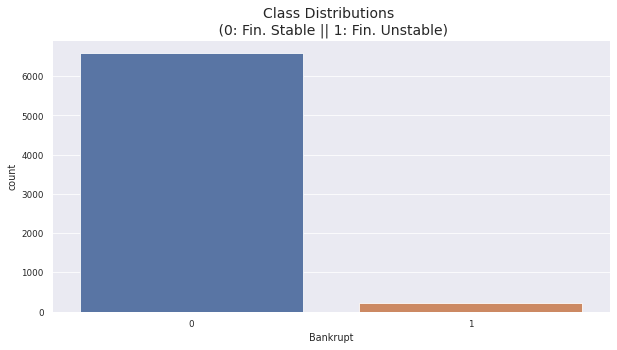

In [ ]:
# Checking labels distributions
sns.set_theme(context = 'paper')

plt.figure(figsize = (10,5))
sns.countplot(data['Bankrupt'])
plt.title('Class Distributions \n (0: Fin. Stable || 1: Fin. Unstable)', fontsize=14)
plt.show()

1. Most of the companies were in stable financial positions.

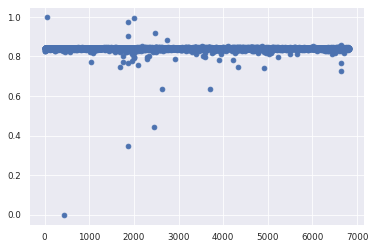

In [ ]:
# Scatter plot showing "Net_Income_to_Stockholder's_Equity"
plt.scatter(data.index,data["Net_Income_to_Stockholder's_Equity"])
plt.show()

Net income to share holder equity of the majority of the companies were around 0.8.

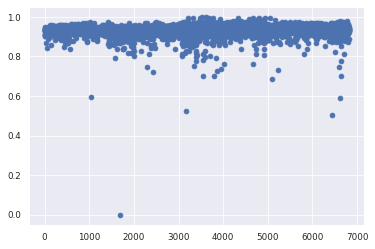

In [ ]:
# Scatter plot showing "Retained_Earnings_to_Total_Assets"
plt.scatter(data.index,data["Retained_Earnings_to_Total_Assets"])
plt.show()

Most of the companies had retained earning to total assests of around 0.9 with the a small fraction of them falling out of this mark.

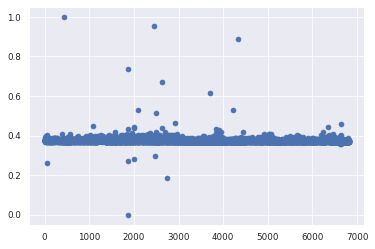

In [ ]:
# Scatter plot showing "Borrowing_dependency"
plt.scatter(data.index,data["Borrowing_dependency"])
plt.show()

The borrowing dependency of most companies were around 0.4 and above, with a few exception falling of these mark.

In [ ]:
# # Plotting Boxplots of the numerical features
# plt.figure(figsize = (20,20))
# ax =sns.boxplot(data = df_1, orient="h")
# ax.set_title('Bank Data Boxplots', fontsize = 18)
# ax.set(xscale="log")
# plt.show()

# Bivariate analysis.

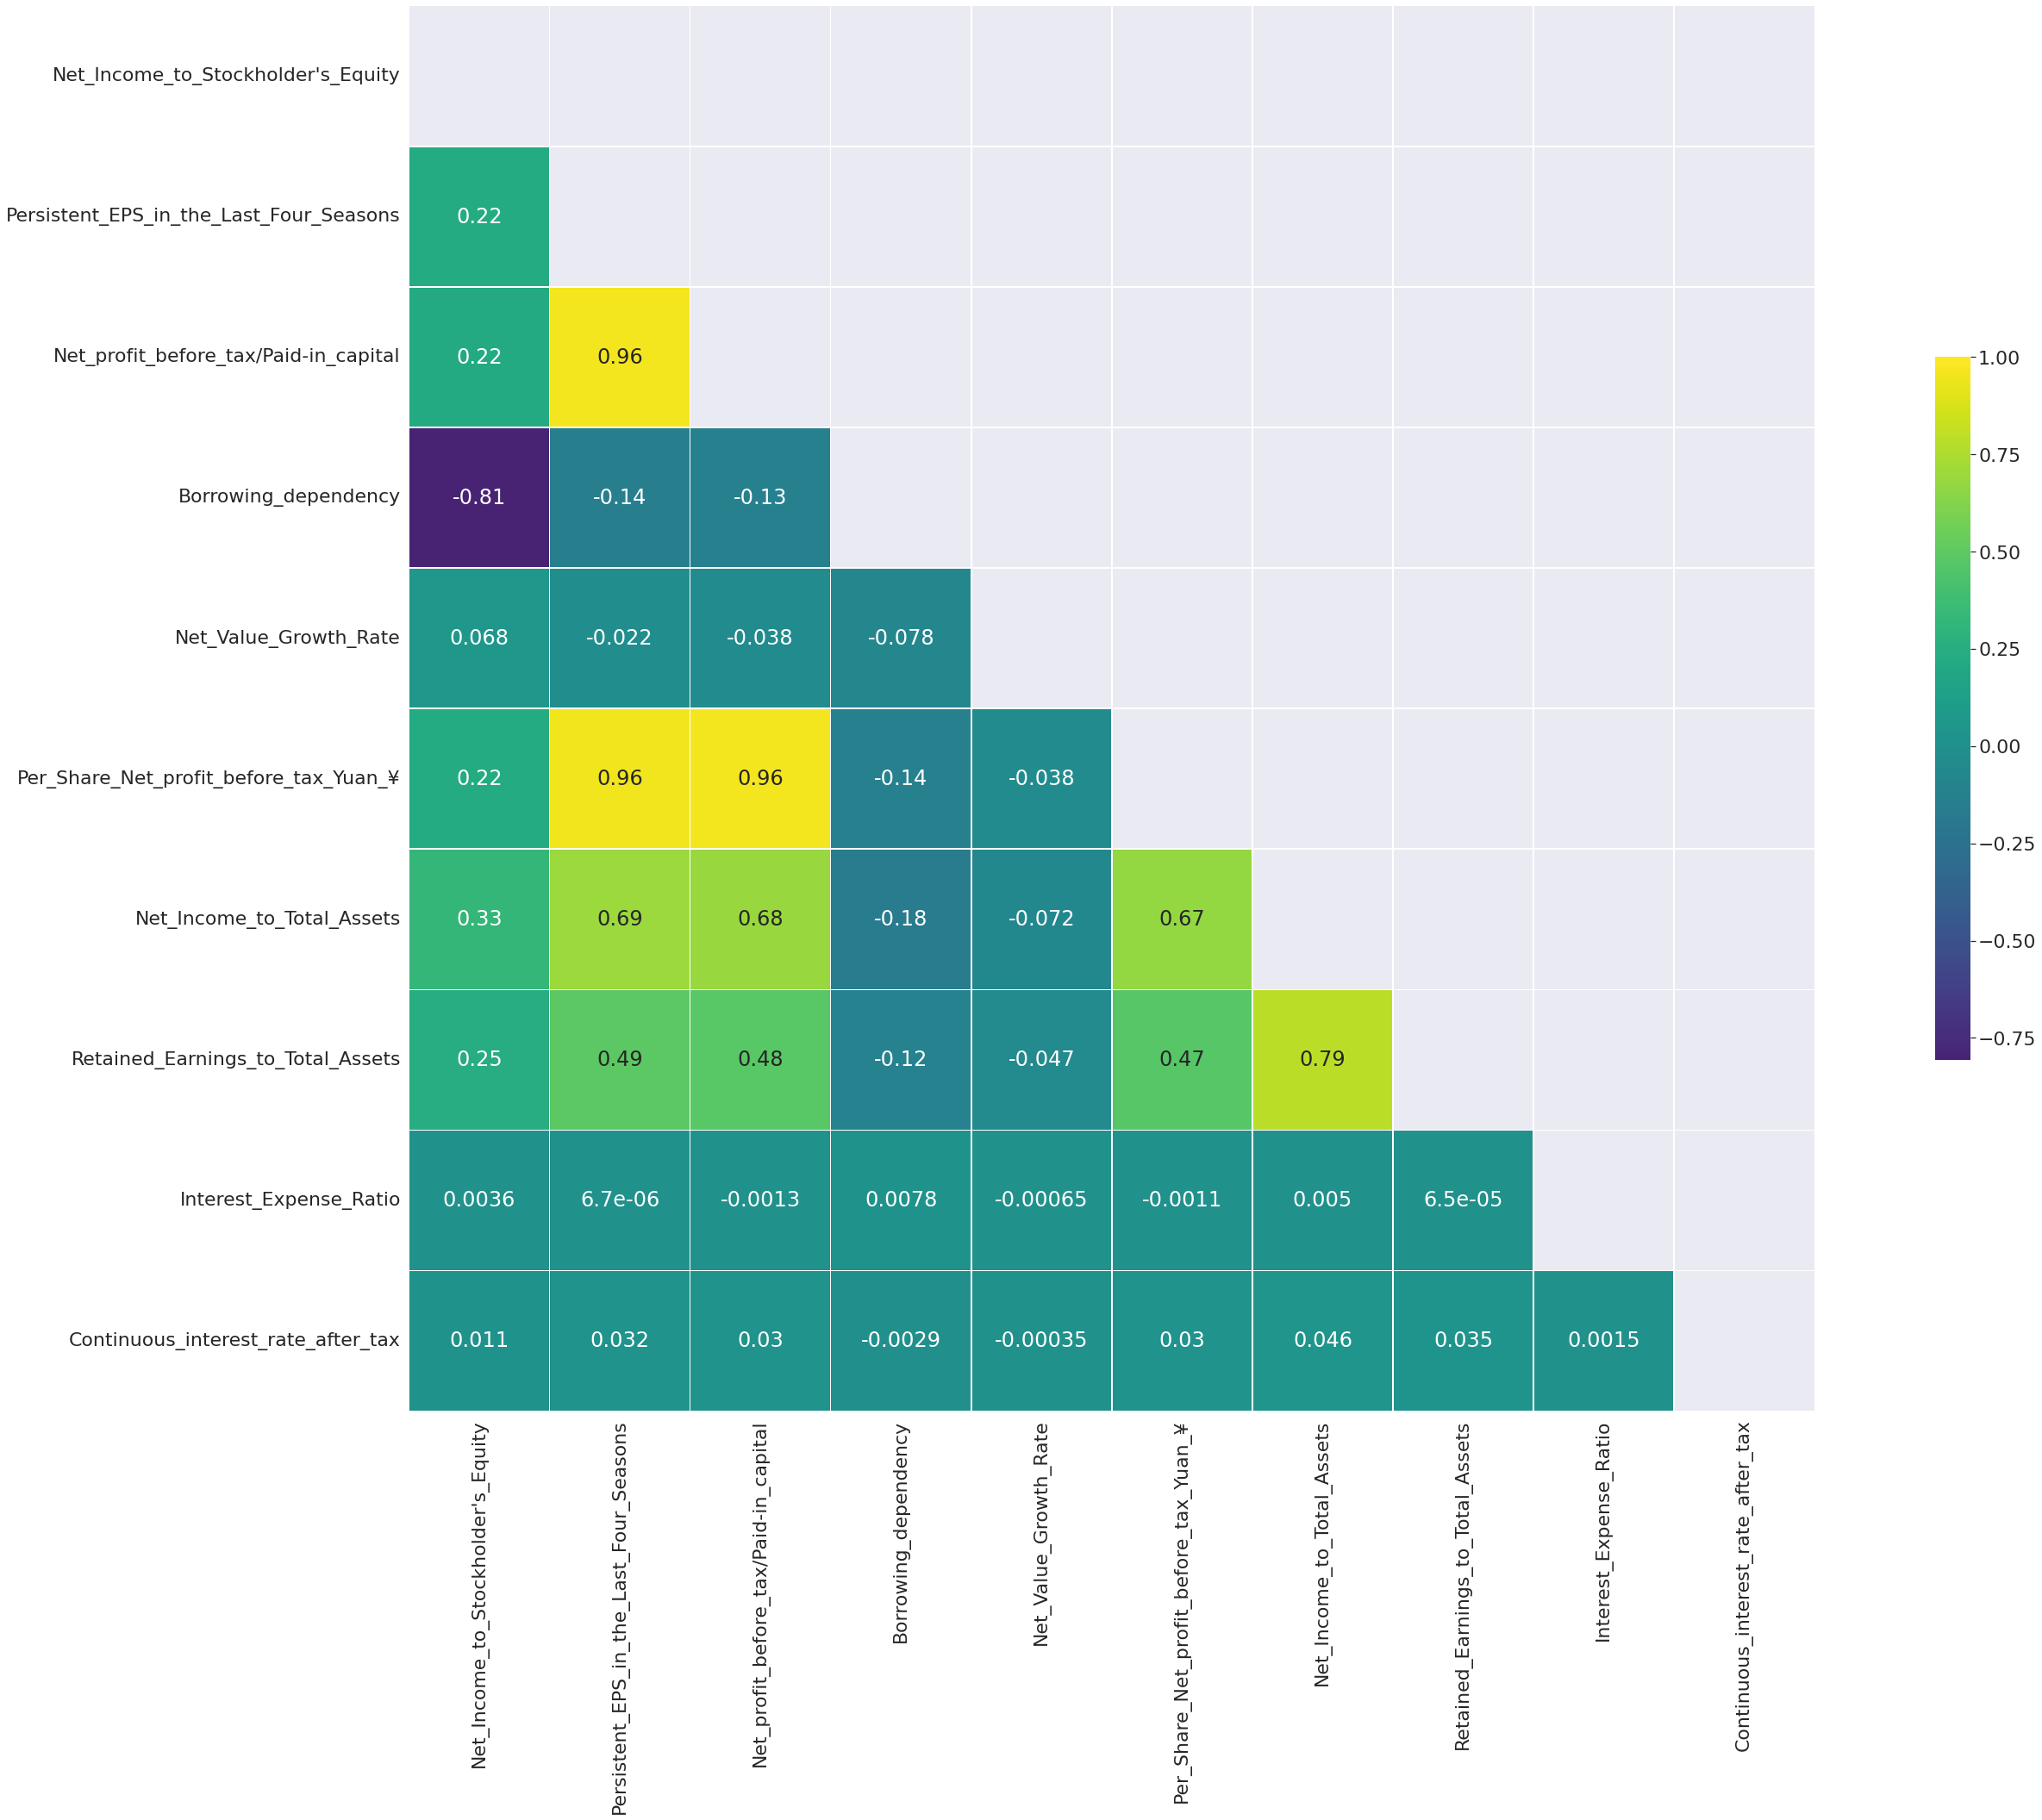

In [ ]:
# # Correlation Heatmap (Spearman)
df_1=data[cols_2]
sns.set(font_scale=2.0)
f, ax = plt.subplots(figsize=(50, 30))
mat = df_1.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap='viridis', vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
sns.scatterplot(x=data.index, y="Net_Income_to_Stockholder's_Equity", hue="bankrupt",
                data=data)

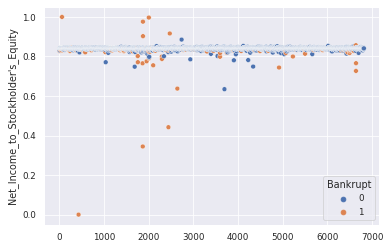

In [ ]:
# Scatter plot showing "Net_Income_to_Stockholder's_Equity"
sns.scatterplot(x=data.index,y=data["Net_Income_to_Stockholder's_Equity"],hue=data['Bankrupt'])

The net income to stock holder equity of stable firms is between 0.65 and 0.88.

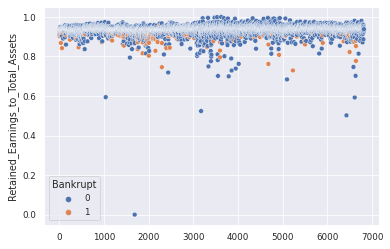

In [ ]:
# Scatter plot showing "Retained_Earnings_to_Total_Assets"
sns.scatterplot(x=data.index,y=data["Retained_Earnings_to_Total_Assets"],hue=data['Bankrupt'])

Unstable firms had a retained earning of less than 0.9

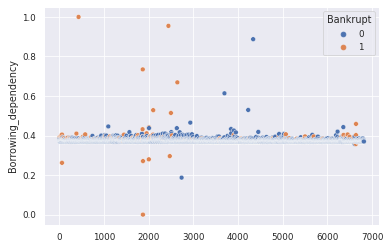

In [ ]:
# Scatter plot showing "Borrowing_dependency"
sns.scatterplot(x=data.index,y=data["Borrowing_dependency"],hue=data['Bankrupt'])

Most of the stable firms had a borrowing dependency of close to 0.39 and 0.6.

# Multivariate analysis.

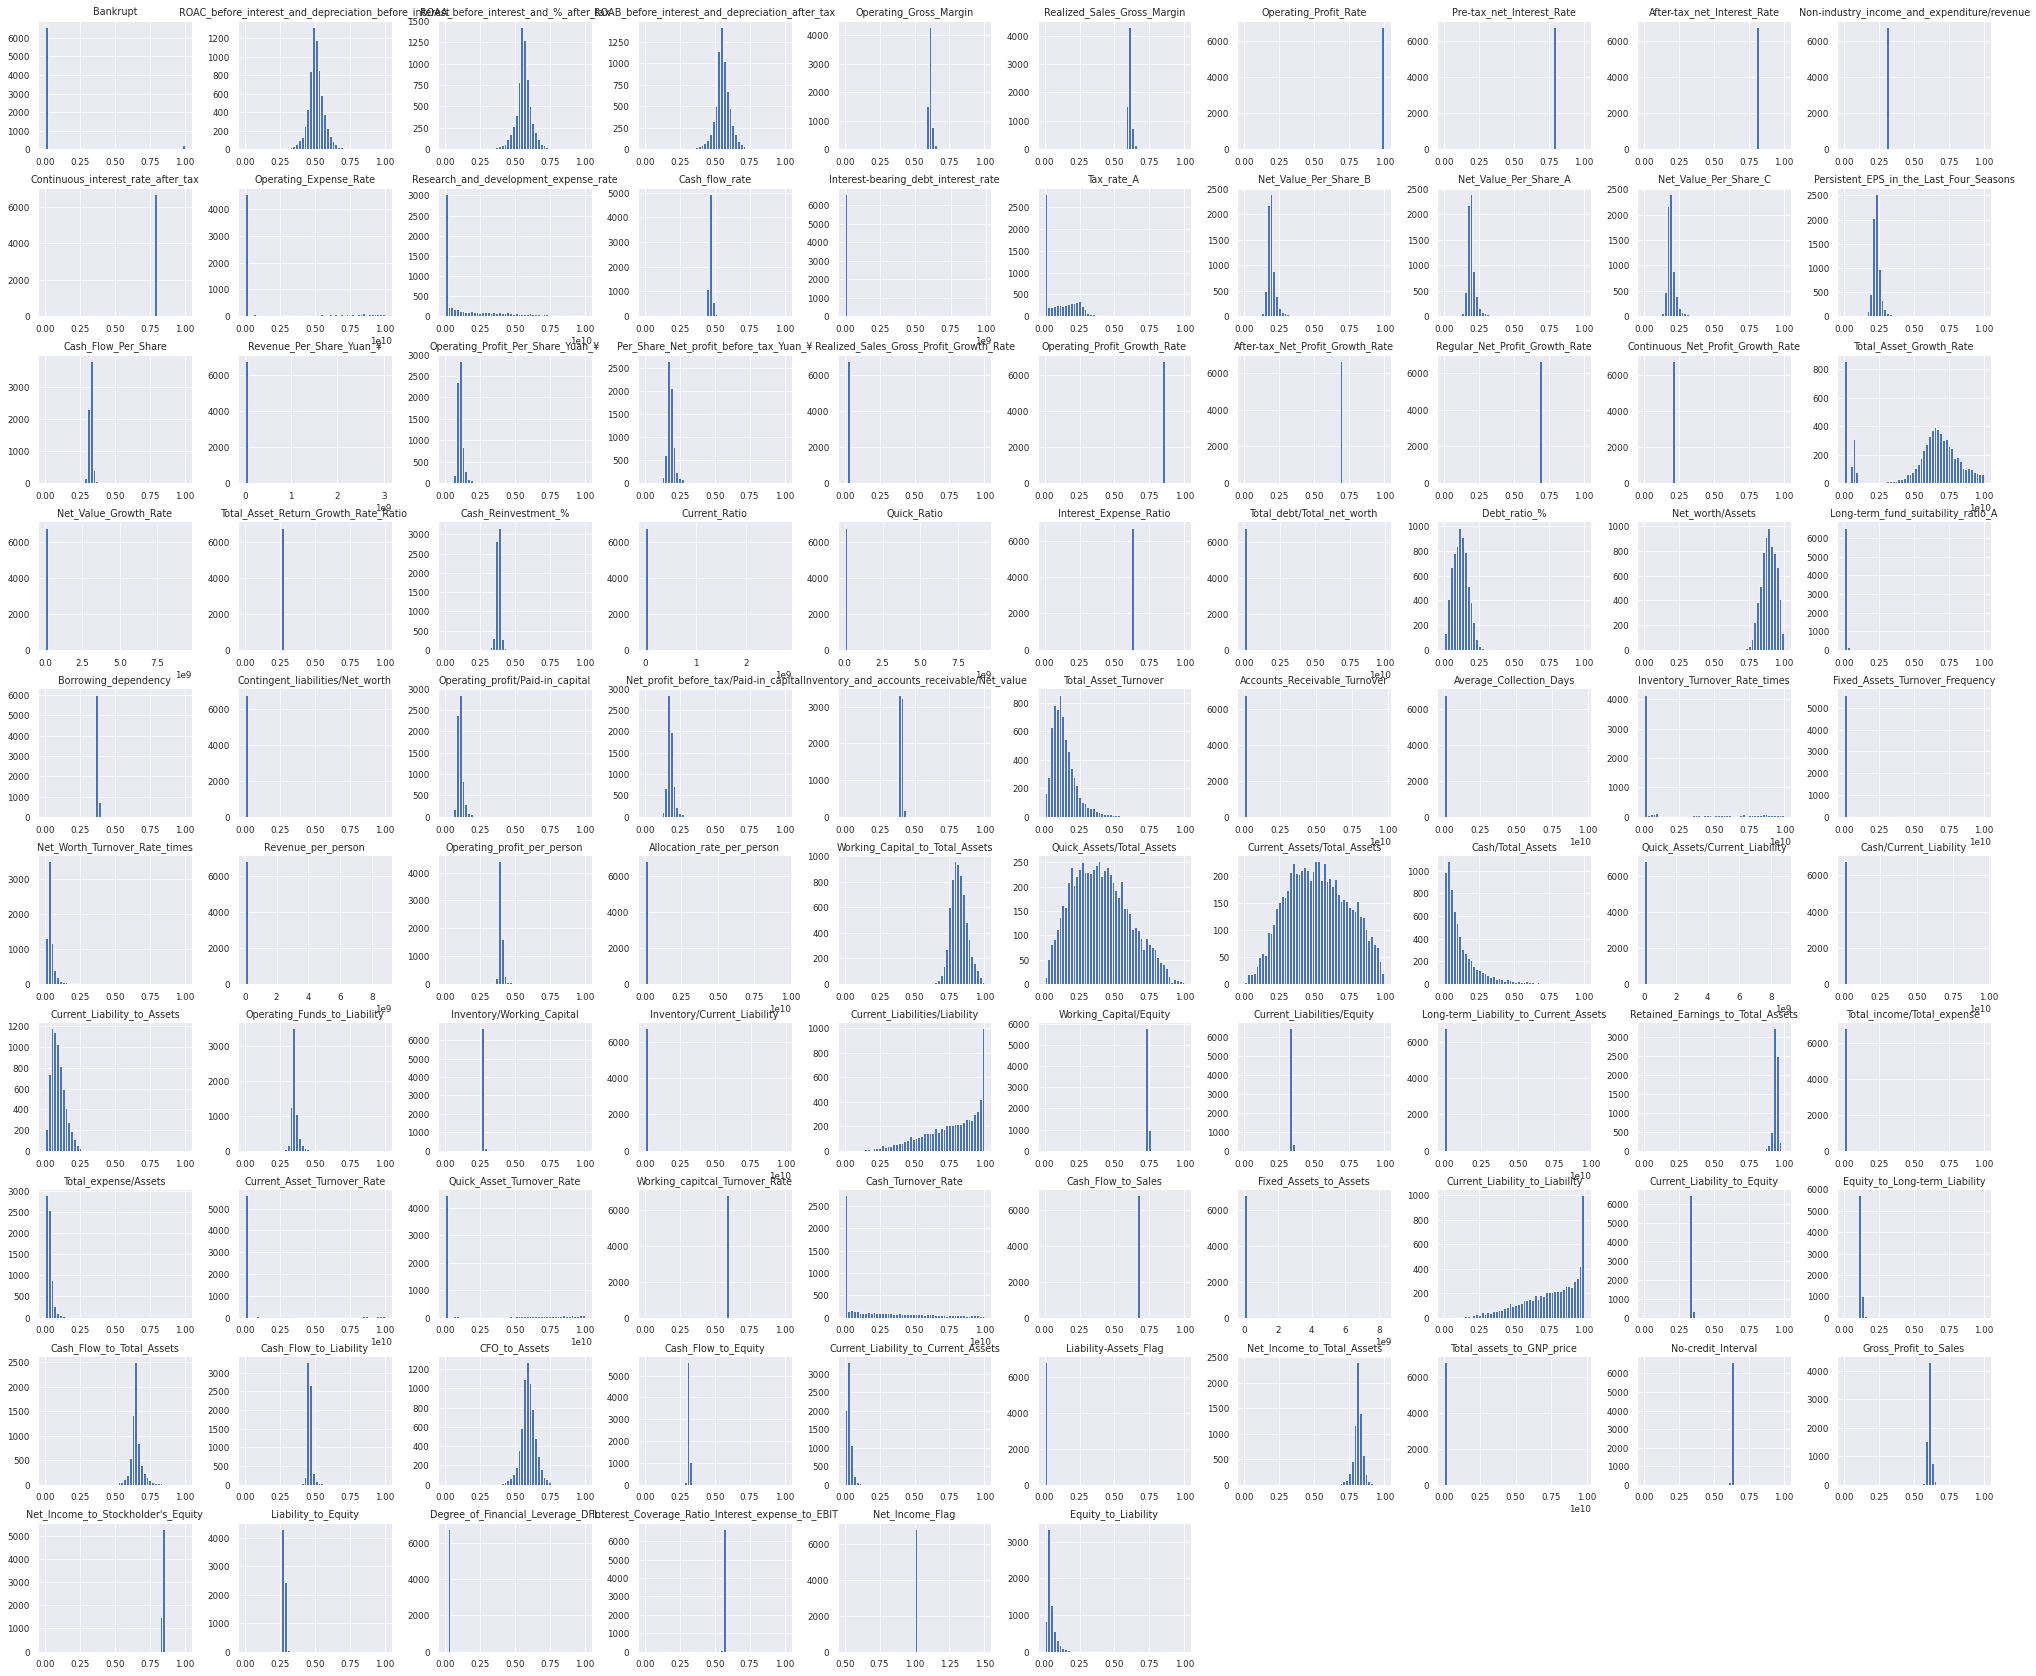

In [ ]:
# Looking at the histograms of numerical data

data.hist(figsize = (35,30), bins = 50)
plt.show()

From the heatmap above the some of the important features had a strong correlation among each other. But we could not drop them since they play important role in the clustering of the model.

Text(0.5, 1.0, 'net_worth/assets \n (Unstable companies)')

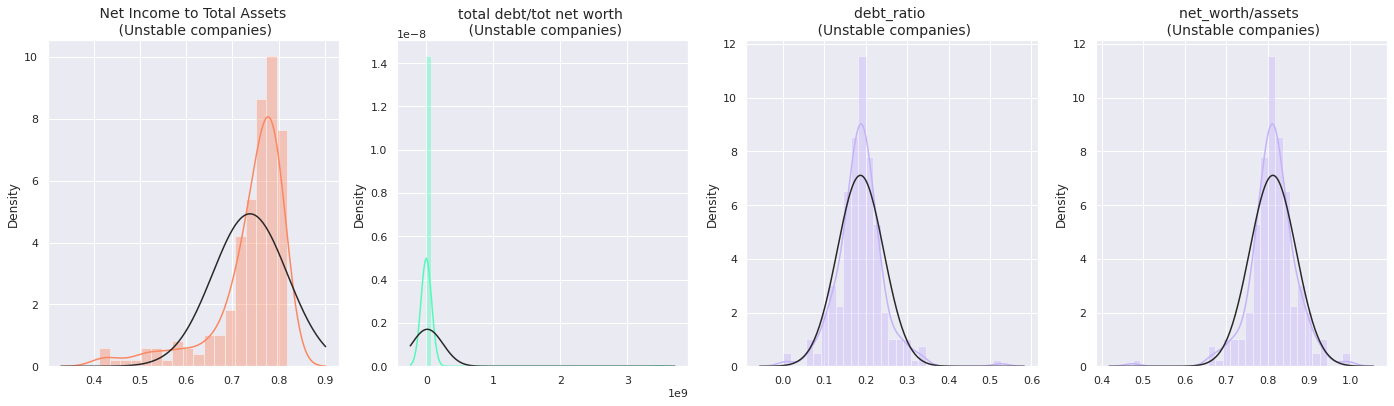

In [ ]:
#Plotting feature Distributions for companies that are close to bankruptcy
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = data['Net_Income_to_Total_Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Net Income to Total Assets \n (Unstable companies)', fontsize=14)

tot_debt_net = data['Total_debt/Total_net_worth'].loc[data['Bankrupt'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('total debt/tot net worth \n (Unstable companies)', fontsize=14)


debt_ratio = data['Debt_ratio_%'].loc[data['Bankrupt'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('debt_ratio \n (Unstable companies)', fontsize=14)

net_worth_assets = data['Net_worth/Assets'].loc[data['Bankrupt'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('net_worth/assets \n (Unstable companies)', fontsize=14)


1.The distribution of the net income of the unstable companies was skewed to the left.

2.The debt ratio of unstable company was almost normally distributed.

3.The net worth of the most unstable companies was normally distributed too.

# Feature importance.

We performed feature importance using the FSelector algorithm and picked the top ten important variables for our analysis.

In [ ]:
#The list of top ten most important features.
cols_2=["Net_Income_to_Stockholder's_Equity","Persistent_EPS_in_the_Last_Four_Seasons",
        "Net_profit_before_tax/Paid-in_capital","Borrowing_dependency","Net_Value_Growth_Rate",
        "Per_Share_Net_profit_before_tax_Yuan_¥","Net_Income_to_Total_Assets",
        "Retained_Earnings_to_Total_Assets","Interest_Expense_Ratio","Continuous_interest_rate_after_tax"]

The top 10 important features in predicting the target variable were as follows;
1. Net_Income_to_Stockholder's_Equity.
2. Persistent_EPS_in_the_Last_Four_Seasons.
3. Net_profit_before_tax/Paid-in_capital.
4. Borrowing_dependency.
5. Net_Value_Growth_Rate.
6. Per_Share_Net_profit_before_tax_Yuan_¥.
7. Net_Income_to_Total_Assets.
8. Retained_Earnings_to_Total_Assets.
9. Interest_Expense_Ratio.
10. Continuous_interest_rate_after_tax .


## PCA

R Notebook PCA analysis [link](http://rpubs.com/deborah_masibo/pca_analysis).

In [ ]:
# Dataset loading
data = pd.read_csv('data.csv')
columns = []
for x in  data.columns:
  columns.append(x.lstrip())

data.columns = columns
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**Seperating Features and Label**

In [ ]:
# Seperating the features and label
# Unlabeled data
X = data.iloc[:,1:]
# Label column
y = data.iloc[:,0]
# Feature set preview
X.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**Standard Scaling**

In [ ]:
# Scaling
sc = StandardScaler()
scaled = sc.fit_transform(X)


The features are scaled, these hepls to reduce the variation in  the data.

**PCA**

In [ ]:
# PCA
pca = PCA()
pca.fit_transform(scaled)

array([[-7.33829438,  0.37329443,  0.30901367, ..., -0.        ,
        -0.        , -0.        ],
       [-2.70371313, -0.9863464 ,  2.15561703, ...,  0.        ,
         0.        , -0.        ],
       [-4.30705863, -0.40470001,  0.30980108, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.91030784, -1.69378646,  1.40977815, ...,  0.        ,
        -0.        ,  0.        ],
       [ 1.85426123, -0.3979228 ,  0.48864039, ..., -0.        ,
        -0.        , -0.        ],
       [ 1.23594197, -2.32944791,  0.46675743, ..., -0.        ,
        -0.        ,  0.        ]])

s

Demensionality reduction of the features.

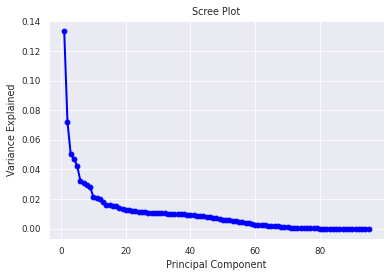

In [ ]:
# Scree plot
values = np.arange(pca.n_components_) + 1
plt.plot(values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The visualization above displays the variance explained against the principal component.

In [ ]:
# Explianed ratio
exp = pca.explained_variance_ratio_
exp

array([0.13346977, 0.07213753, 0.05036685, 0.04724484, 0.04234718,
       0.0322023 , 0.03049291, 0.02934268, 0.0280185 , 0.02156488,
       0.02059148, 0.01984625, 0.0178892 , 0.01600532, 0.01577908,
       0.01533237, 0.01514449, 0.01397153, 0.01314868, 0.01274245,
       0.01248121, 0.01217504, 0.01160926, 0.01119518, 0.01110326,
       0.01099148, 0.01075571, 0.01073014, 0.01071275, 0.01048095,
       0.01038181, 0.01026907, 0.01018961, 0.01013562, 0.00998788,
       0.00978913, 0.00969166, 0.0096509 , 0.00936015, 0.00908422,
       0.00900332, 0.00883054, 0.00853073, 0.00845686, 0.00804693,
       0.00762726, 0.00729723, 0.007007  , 0.00638461, 0.00605721,
       0.0057794 , 0.00573047, 0.00534135, 0.00496513, 0.00450023,
       0.00438088, 0.00411521, 0.00346504, 0.00344533, 0.00266464,
       0.00260696, 0.00229752, 0.00228159, 0.00179802, 0.00176183,
       0.00164633, 0.00149517, 0.00119626, 0.00090187, 0.00087436,
       0.00067739, 0.00057107, 0.00039941, 0.00030955, 0.00026

In [ ]:
# Suggested PCs = 6
sum = 0
for i in exp[:6]:
  sum += i

sum


0.37776845657421093

This only explains 37% of the variance.

In [ ]:
# 95% of variance explained

def Index(limit, array):
  index = 0
  sum = 0
  for i in array:
    sum += i
    if sum >= limit:
      break
    index += 1
  print(index)


Index(0.955, exp)

53


The first 53 components account for 95% of the variance, therefore, the remaining components will be dropped.

In [ ]:
# Selecting the first 53 components.
pca = PCA(n_components = 53)
selected = pca.fit_transform(scaled)
selected.shape

(6819, 53)

**Important Features of the First 3 PCs**

In [ ]:
# Columns with highest contribution to PC1, PC2 and PC3
features = {'PC1' : ['ROA(A) before interest and % after tax', 
                     'Persistent EPS in the Last Four Seasons',
                     'ROA(C) before interest and depreciation before interest',
                     'ROA(B) before interest and depreciation after tax',	
                     'Net profit before tax/Paid-in capital'], 
            'PC2': ['Current Liabilities/Equity', 
                    'Current Liability to Equity', 
                    'Liability to Equity',
                    'Borrowing dependency', 
                    'Inventory and accounts receivable/Net value'], 
            'PC3': ['Current Liabilities/Equity',
                    'Current Liability to Equity', 
                    'Liability to Equity',
                    'Borrowing dependency', 
                    'Inventory and accounts receivable/Net value']}
            
features_df = pd.DataFrame(features)
features_df.head()

,PC1,PC2,PC3
0,ROA(A) before interest and % after tax,Current Liabilities/Equity,Current Liabilities/Equity
1,Persistent EPS in the Last Four Seasons,Current Liability to Equity,Current Liability to Equity
2,ROA(C) before interest and depreciation before...,Liability to Equity,Liability to Equity
3,ROA(B) before interest and depreciation after tax,Borrowing dependency,Borrowing dependency
4,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Inventory and accounts receivable/Net value


## KMeans

### Optimal Number of Clusters

**Elbow Method**

Text(0, 0.5, 'WCSS')

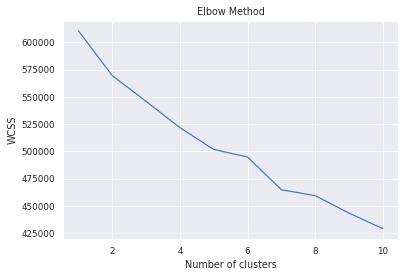

In [ ]:
# Elbow method
wcss=[]
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(selected)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

clusters = range(1,11)
plt.plot(clusters,wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

The optimal number of clusters is not clear. The number of clusters will be derived using the silhouette method.

**Silhouette Method**

In [ ]:
# List for coefficients
sil_coef = []
for k in range(2,11):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(selected)
  score = silhouette_score(selected, kmeans.labels_)
  sil_coef.append(score)

Text(0, 0.5, 'Silhouette Coefficient')

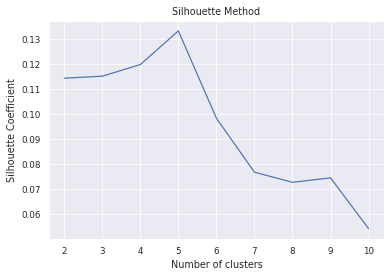

In [ ]:
# Plot
plt.plot(range(2,11), sil_coef)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

The optimal number = 3, as it has the highest silhouette coefficient.

### KMeans Clustering

**K=2 - Original number of clusters**

In [ ]:
# K = 2
kmeans = KMeans(2, random_state= 0)
clusters = kmeans.fit_predict(selected)
len(clusters)

6819

In [ ]:
# Centers
kmeans = KMeans(2, random_state= 0)
kmeans.fit_predict(selected)
centroids = kmeans.cluster_centers_
centroids.shape[0]

2

In [ ]:
# Visialization data frame
viz_df = X.copy()
viz_df['Clusters'] = clusters
viz = selected.copy()
# Converting to 2D array
clust = clusters.reshape(-1,1)
# Appending clusters column
viz = np.append(viz, clust, axis = 1)
viz.shape

(6819, 54)

In [ ]:
# Visualization function
def Kmeans_Visualization(cluster, x, y, data, type, centers = None):
  # Unique clusters
  unique = np.unique(data[cluster])
  # Visualization
  for i in unique:
    plt.scatter(data[data[cluster] == i][x], data[data[cluster] == i][y],
                label = i)
  if type == 'pca':
    plt.scatter(centers[:,0], centers[:,1], c = 'black')
  elif type == 'normal':
    pass
  plt.title('KMeans Clusters Original Dataset', y = 1.05)
  plt.xlabel(x)
  plt.ylabel(y)
  plt.legend()
  plt.show()



In [ ]:
# 3D function
def ClusterPlot3D(x,y,z,colors,data,title):
  data[colors] = data[colors].astype('str')
  fig = px.scatter_3d(data, x=x, y=y, z=z,color=colors,
                    title=title)
  # fig.update_traces(marker_coloraxis=None)
  fig.show()

In [ ]:
# PCA data frame
pca_df = pd.DataFrame(viz)
# Renaming columns
num = 0
names = []
for i in range(53):
  num += 1
  col = 'PC' + str(num)
  names.append(col)
names.append('Clusters')
pca_df.columns = names

# Result
pca_df.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
       'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19',
       'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28',
       'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37',
       'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46',
       'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'Clusters'],
      dtype='object')

### Cluster Visualizations

**K=2**

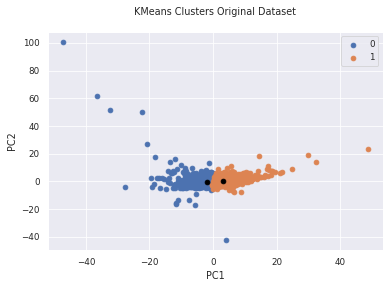

In [ ]:
# PCA dataset
# k = 2
pca_df.Clusters = pca_df.Clusters.astype('int64')
Kmeans_Visualization('Clusters', x = 'PC1', y = 'PC2', data = pca_df,
                     type = 'pca', centers = centroids)

The clusters overlap.

In [ ]:
# PCA 3D
ClusterPlot3D('PC1', 'PC2', 'PC3', 'Clusters', pca_df, 'K=2 (PCA)')

* The clusters lie on opposite sides of the first principle component.
* The second cluster is dense at its center, with outliers. This suggests that the extreme values can be clustered on their own as they are closer to each other, that to the clster.


**K = 3 - Optminal Number**

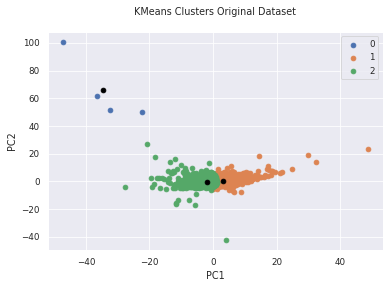

In [ ]:
# PCA dataset
# K = 3
kmeans = KMeans(3, random_state= 0)
kmeans.fit_predict(selected)
clusters = kmeans.fit_predict(selected)
centroids = kmeans.cluster_centers_
pca_df['Clusters'] = clusters
Kmeans_Visualization('Clusters', 'PC1', 'PC2', pca_df, type = 'pca', 
                     centers = centroids)

* Setting k = 3 seperates the extreme values, previously part of the second cluster.
* The largest clusters still overlap.

In [ ]:
# PCA 3D
ClusterPlot3D('PC1', 'PC2', 'PC3', 'Clusters', pca_df, 'K=3 (PCA)')

Whereas the largest clusters have higher values for PC1 and PC2, the new cluster has points with higher representations in PC2 nad PC3.

### Feature Contribution Plot

In [ ]:
def ContributionPlot(components, x,y,cols, data,color):
  scaled = sc.fit_transform(data[cols])
  pca = PCA(n_components = components)
  components = pca.fit_transform(scaled)
  loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
  fig = px.scatter(components, x = x, y = y,
                  color = color)

  for i, feature in enumerate(cols):
    fig.add_shape(
        type = 'line',
        x0 = 0, y0 = 0,
        x1=loadings[i,0],
        y1=loadings[i,1]
    )
    fig.add_annotation(
        x=loadings[i,0],
        y=loadings[i,1],
        ax=0, ay=0,
        xanchor='center',
        yanchor='bottom',
        text=feature

    )
  fig.update_layout(yaxis_range=[-2,2], xaxis_range=[-2,2])
  fig.show()

**PC1 and PC2**

In [ ]:
# PC1 and PC2
cols12 = list(features_df.PC1)
cols12.extend(list(features_df.PC2))
# Variables
cluster = pca_df['Clusters'].astype('str')
ContributionPlot(3, cols = cols12, x= 0, y = 1, data = data, color=cluster)

**PC2 and PC3**

In [ ]:
# PC2 and PC3
cols12 = list(features_df.PC1)
cols12.extend(list(features_df.PC2))
# Variables
cluster = pca_df['Clusters'].astype('str')
ContributionPlot(3, cols = cols12, x= 1, y = 2, data = data, color=cluster)

The feature contributions analysis was also done using R, and it was more in depth [link](http://rpubs.com/deborah_masibo/pca_analysis).

## Hierarchichal Clustering

### Dendrograms

**Ward Linkage**

Text(0, 0.5, 'Euclidean Distances')

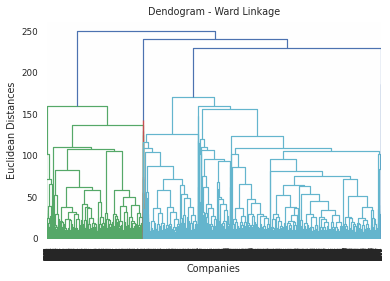

In [ ]:
# Dendrogram
# Ward
dendrogram(linkage(selected, method = 'ward'))
plt.title('Dendogram - Ward Linkage')
plt.xlabel('Companies')
plt.ylabel('Euclidean Distances')

The optimal number of clusters for the ward method = 4.

**Average Linkage**

Text(0, 0.5, 'Euclidean Distances')

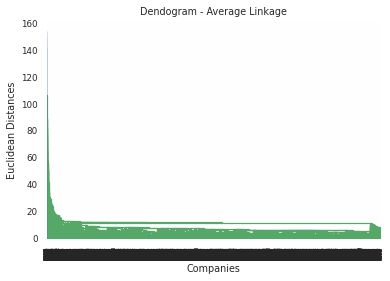

In [ ]:
# Dendrogram
# Average
dendrogram(linkage(selected, method = 'average'))
plt.title('Dendogram - Average Linkage')
plt.xlabel('Companies')
plt.ylabel('Euclidean Distances')

The average method does not provide a good visualisation of its clusters.

**Complete Linkage**

Text(0, 0.5, 'Euclidean Distances')

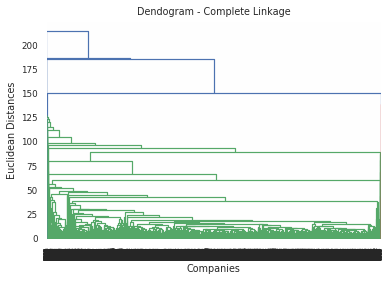

In [ ]:
# Dendrogram
# Complete
dendrogram(linkage(selected, method = 'complete'))
plt.title('Dendogram - Complete Linkage')
plt.xlabel('Companies')
plt.ylabel('Euclidean Distances')

Though clearer than the grapgh generated using the average linkage method, the ward method provides the best clustering results.

The ward linkage method provides the best result.

### Clustering Summary

Text(0, 0.5, 'Euclidean Distances')

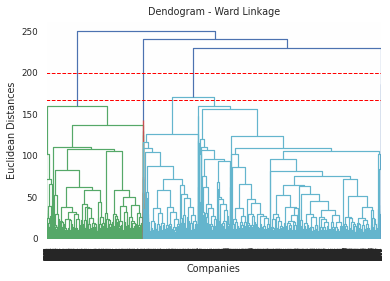

In [ ]:
# Dendrogram
# Ward
dend = dendrogram(linkage(selected, method = 'ward'))
plt.axhline(y = 167, c = 'red', lw = 1, linestyle = 'dashed')
plt.axhline(y = 200, c = 'red', lw = 1, linestyle = 'dashed')
plt.title('Dendogram - Ward Linkage')
plt.xlabel('Companies')
plt.ylabel('Euclidean Distances')

As summarizes above, the optimal number of clusters = 4.

Text(0, 0.5, 'Euclidean Distances')

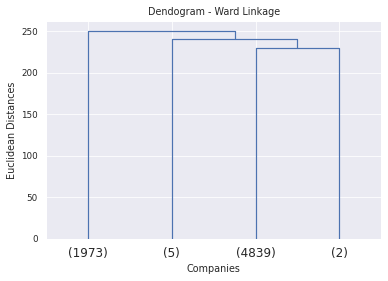

In [ ]:
# Truncate
dendrogram(linkage(selected, method = 'ward'), truncate_mode = 'lastp', p = 4)
plt.title('Dendogram - Ward Linkage')
plt.xlabel('Companies')
plt.ylabel('Euclidean Distances')

* There are two large clusters, one with 1814 observations, and the other with 4998.
* The smaller clusters only have 5 and 2 observations. Visualization will be used to analyze their placement on the PCA dimensional space.

### Visualization

**Functions**

In [ ]:
# Clusters
def HClusters(k, data):
  clusth = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean',
                                   linkage = 'ward')
  clusters = clusth.fit_predict(data)
  return clusters

In [ ]:
# Visualization function
def AggClustViz(k, x, y, data, title):
  clusth = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean',
                                   linkage = 'ward')
  clusters = clusth.fit_predict(data)
  plt.scatter(data[x], pca_df[y], c = clusters, cmap = 'rainbow') 
  plt.xlabel('PC1')
  plt.ylabel('PC2')
  plt.title(title)
  plt.show()


In [ ]:
# 3D function
def ClusterPlotH3D(k,x,y,z,data,title):
  clusth = AgglomerativeClustering(n_clusters = k, affinity = 'euclidean',
                                   linkage = 'ward')
  clusters = clusth.fit_predict(data)
  clusters = clusters.astype('str')
  fig = px.scatter_3d(data, x=x, y=y, z=z,color=clusters,
                    title=title)
  # fig.update_traces(marker_coloraxis=None)
  fig.show()

**K=4 Clusters**

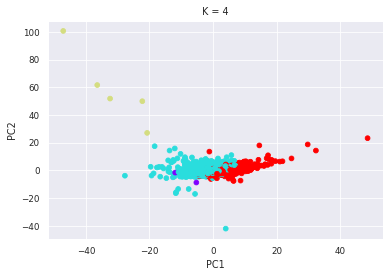

In [ ]:
# K = 4
# Clusters
clust_data = pca_df.drop('Clusters', axis = 1)
AggClustViz(4, 'PC1', 'PC2', clust_data, 'K = 4')

In [ ]:
# 3D Visualization
ClusterPlotH3D(4,'PC1', 'PC2', 'PC3', clust_data, 'Hierarchical Clusters')

* The previous clusters from KMeans weree preserved. However, the 2 largest clusters each have a point that is part of the new, and smallest cluster.
* Further analysis will be done to determine the significance of these clusters.

## Clustering Summary

In [ ]:
# Most important columns from the 3 PCs
columns = list(features_df['PC1'])
columns.extend(list(features_df['PC2']))
columns.extend(list(features_df['PC3']))
# Unique columns
unique = set(columns)
unique = list(unique)
unique

['ROA(A) before interest and % after tax',
 'Persistent EPS in the Last Four Seasons',
 'Net profit before tax/Paid-in capital',
 'ROA(B) before interest and depreciation after tax',
 'Current Liabilities/Equity',
 'ROA(C) before interest and depreciation before interest',
 'Current Liability to Equity',
 'Borrowing dependency',
 'Inventory and accounts receivable/Net value',
 'Liability to Equity']

In [ ]:
# Data subset
pcs_feat = data[unique]
pcs_feat.head()

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity
0,0.424389,0.169141,0.137757,0.405750,0.339077,0.370594,0.339077,0.390284,0.398036,0.290202
1,0.538214,0.208944,0.168962,0.516730,0.329740,0.464291,0.329740,0.376760,0.397725,0.283846
2,0.499019,0.180581,0.148036,0.472295,0.334777,0.426071,0.334777,0.379093,0.406580,0.290189
3,0.451265,0.193722,0.147561,0.457733,0.331509,0.399844,0.331509,0.379743,0.397925,0.281721
4,0.538432,0.212537,0.167461,0.522298,0.330726,0.465022,0.330726,0.375025,0.400079,0.278514


In [ ]:
# Appending clusters
clust = HClusters(4,clust_data)
pcs_feat['Clusters'] = list(clust)
pcs_feat.Clusters

0       1
1       1
2       1
3       1
4       1
       ..
6814    1
6815    1
6816    3
6817    1
6818    3
Name: Clusters, Length: 6819, dtype: int64

In [ ]:
pcs_feat.head()

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity,Clusters
0,0.424389,0.169141,0.137757,0.405750,0.339077,0.370594,0.339077,0.390284,0.398036,0.290202,1
1,0.538214,0.208944,0.168962,0.516730,0.329740,0.464291,0.329740,0.376760,0.397725,0.283846,1
2,0.499019,0.180581,0.148036,0.472295,0.334777,0.426071,0.334777,0.379093,0.406580,0.290189,1
3,0.451265,0.193722,0.147561,0.457733,0.331509,0.399844,0.331509,0.379743,0.397925,0.281721,1
4,0.538432,0.212537,0.167461,0.522298,0.330726,0.465022,0.330726,0.375025,0.400079,0.278514,1


In [ ]:
# Cluster data frame subsets
one = pcs_feat[pcs_feat['Clusters'] == 0].drop('Clusters', axis = 1)
two = pcs_feat[pcs_feat['Clusters'] == 1].drop('Clusters', axis = 1)
three = pcs_feat[pcs_feat['Clusters'] == 2].drop('Clusters', axis = 1)
four = pcs_feat[pcs_feat['Clusters'] == 3].drop('Clusters', axis = 1)

### Cluster Descriptions

**Cluster 1**

*Size*

In [ ]:
# Number of rows
one.shape[0]

2

The first cluster is the smallest, derived from the two largest clusters.

*Description*

In [ ]:
# Description
# 1st cluster
one.describe()

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,0.497438,0.207573,0.163581,0.485572,0.331229,0.435675,0.331229,0.371963,0.393715,0.279272
std,0.025364,0.005683,0.004698,0.017792,0.006364,0.015857,0.006364,0.001205,0.000072,0.004602
min,0.479503,0.203555,0.160259,0.472991,0.326729,0.424463,0.326729,0.371111,0.393664,0.276017
25%,0.488470,0.205564,0.161920,0.479282,0.328979,0.430069,0.328979,0.371537,0.393690,0.277645
50%,0.497438,0.207573,0.163581,0.485572,0.331229,0.435675,0.331229,0.371963,0.393715,0.279272
75%,0.506405,0.209582,0.165242,0.491863,0.333479,0.441281,0.333479,0.372389,0.393741,0.280899
max,0.515373,0.211591,0.166903,0.498153,0.335729,0.446887,0.335729,0.372816,0.393766,0.282526


The median = mean, therefore, the distribution for all columns are normal.

**Cluster 2**

*Size*

In [ ]:
# Number of rows
two.shape[0]

4839

The second cluster is the largest.

*Description*

In [ ]:
# Description
# 2nd cluster
two.describe()

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity
count,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000,4839.000000
mean,0.540613,0.220459,0.175183,0.536520,0.332119,0.487968,0.332119,0.375727,0.403535,0.281171
std,0.058542,0.021677,0.019607,0.054177,0.009010,0.051829,0.009010,0.010735,0.011557,0.008423
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.524259,0.210457,0.165836,0.519086,0.328695,0.468800,0.328695,0.371624,0.397953,0.277971
50%,0.550316,0.220384,0.174708,0.542963,0.330625,0.492956,0.330625,0.374206,0.401106,0.279871
75%,0.571631,0.231067,0.184420,0.565394,0.333589,0.516014,0.333589,0.377855,0.406443,0.282682
max,0.741441,0.393306,0.331069,0.753681,0.523022,0.673232,0.523022,0.613650,0.611017,0.435907


**Cluster 3**

*Size*

In [ ]:
# Number of rows
three.shape[0]

5

The third cluster is the second smallest in size.

*Description*

In [ ]:
# Description
# 3rd cluster
three.describe()

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.355909,0.125820,0.093044,0.374506,0.693279,0.331575,0.693279,0.849178,0.653452,0.705142
std,0.099185,0.025628,0.019707,0.090992,0.198551,0.082684,0.198551,0.142260,0.215301,0.189661
min,0.236862,0.101825,0.079888,0.237272,0.526052,0.207722,0.526052,0.669026,0.454522,0.484318
25%,0.279655,0.109577,0.081728,0.359441,0.536635,0.311315,0.536635,0.734611,0.517217,0.643692
50%,0.362680,0.112319,0.087618,0.360887,0.627817,0.325793,0.627817,0.887435,0.588075,0.652347
75%,0.422372,0.143708,0.088297,0.450131,0.775890,0.393702,0.775890,0.954819,0.707445,0.745352
max,0.477976,0.161672,0.127690,0.464800,1.000000,0.419344,1.000000,1.000000,1.000000,1.000000


**Cluster 4**

*Size*

In [ ]:
# Number of rows
four.shape[0]

1973

The last cluster is the second largest in size.

*Description*

In [ ]:
# Description
# 4th cluster
four.describe()

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity
count,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000,1973.000000
mean,0.603378,0.249585,0.201436,0.595975,0.328754,0.547903,0.328754,0.370823,0.399193,0.277314
std,0.059593,0.045175,0.042685,0.057452,0.003090,0.059111,0.003090,0.002197,0.004336,0.002796
min,0.272405,0.107214,0.072973,0.347556,0.326214,0.306245,0.326214,0.369637,0.393663,0.274779
25%,0.566561,0.225489,0.179376,0.557953,0.327480,0.508653,0.327480,0.369637,0.396476,0.275970
50%,0.597362,0.240711,0.192602,0.592162,0.328204,0.543655,0.328204,0.369918,0.398487,0.276733
75%,0.632959,0.260944,0.211515,0.626425,0.329347,0.579632,0.329347,0.371234,0.400871,0.278002
max,1.000000,1.000000,1.000000,1.000000,0.414639,1.000000,0.414639,0.409987,0.500358,0.347143


For the rest,the deviation between the mean and median is slight, therefore, the clusters will be compared using their means.

### Average Variable Summary Per Cluster

In [ ]:
# Averages dataset
names = pcs_feat.drop('Clusters', axis = 1)
averages = pd.DataFrame([list(one.mean()), list(two.mean()), 
                         list(three.mean()), list(four.mean())],
                         columns = list(names.columns),
                         index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 
                                  'Cluster 4'])
averages.head()

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity
Cluster 1,0.497438,0.207573,0.163581,0.485572,0.331229,0.435675,0.331229,0.371963,0.393715,0.279272
Cluster 2,0.540613,0.220459,0.175183,0.536520,0.332119,0.487968,0.332119,0.375727,0.403535,0.281171
Cluster 3,0.355909,0.125820,0.093044,0.374506,0.693279,0.331575,0.693279,0.849178,0.653452,0.705142
Cluster 4,0.603378,0.249585,0.201436,0.595975,0.328754,0.547903,0.328754,0.370823,0.399193,0.277314


The data frame above is a summary of the variable average result per cluster.

### Variable Range Summary Per Cluster

In [ ]:
# Get ranges function
def Rangedffunc(lst):
  range = []
  for clust in lst:
    max = list(round(clust.max(),2))
    min = list(round(clust.min(),2))
    for x,y in zip(max1,min2):
      val = f'{x} - {y}'
      range.append(val)
  return range

In [ ]:
# Minimum and minimum values for each variable per cluster
max1 = list(round(one.max(),2))
min1 = list(round(one.min(),2))
max2 = list(round(two.max(),2))
min2 = list(round(two.min(),2))
max3 = list(round(three.max(),2))
min3 = list(round(three.min(),2))
max4 = list(round(four.max(),2))
min4 = list(round(four.min(),2))

In [ ]:
# Ranges
range = []
for x,y in zip(max1,min1):
    val = f'{y} - {x}'
    range.append(val)
for x,y in zip(max2,min2):
    val = f'{y} - {x}'
    range.append(val)
for x,y in zip(max3,min3):
    val = f'{y} - {x}'
    range.append(val)
for x,y in zip(max4,min4):
    val = f'{y} - {x}'
    range.append(val)

In [ ]:
# Range data frame
ranges_df = pd.DataFrame([range[:10], range[10:20], range[20:30], range[30:]],
                         columns = list(names.columns),
                         index = ['Cluster 1', 'Cluster 2', 'Cluster 3', 
                                  'Cluster 4'])
ranges_df

,ROA(A) before interest and % after tax,Persistent EPS in the Last Four Seasons,Net profit before tax/Paid-in capital,ROA(B) before interest and depreciation after tax,Current Liabilities/Equity,ROA(C) before interest and depreciation before interest,Current Liability to Equity,Borrowing dependency,Inventory and accounts receivable/Net value,Liability to Equity
Cluster 1,0.48 - 0.52,0.2 - 0.21,0.16 - 0.17,0.47 - 0.5,0.33 - 0.34,0.42 - 0.45,0.33 - 0.34,0.37 - 0.37,0.39 - 0.39,0.28 - 0.28
Cluster 2,0.0 - 0.74,0.0 - 0.39,0.0 - 0.33,0.0 - 0.75,0.0 - 0.52,0.0 - 0.67,0.0 - 0.52,0.0 - 0.61,0.0 - 0.61,0.0 - 0.44
Cluster 3,0.24 - 0.48,0.1 - 0.16,0.08 - 0.13,0.24 - 0.46,0.53 - 1.0,0.21 - 0.42,0.53 - 1.0,0.67 - 1.0,0.45 - 1.0,0.48 - 1.0
Cluster 4,0.27 - 1.0,0.11 - 1.0,0.07 - 1.0,0.35 - 1.0,0.33 - 0.41,0.31 - 1.0,0.33 - 0.41,0.37 - 0.41,0.39 - 0.5,0.27 - 0.35


The data frame above is a summary of the variable ranges per cluster.

## Random Forest Classifier

*Feature and Label Sets*

In [ ]:
# Features and label sets
X = pcs_feat.drop('Clusters', axis = 1).values
y = pcs_feat.iloc[:,-1].values.reshape(-1,1)


In [ ]:
# Random Forest Classification Model
def TrainEvaluate(X,y):
  # Training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
  # Standard scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Model training
  classifier = RandomForestClassifier(n_estimators = 500, random_state = 100)
  classifier.fit(X_train, y_train)

  # Predicting the test set results
  y_pred = classifier.predict(X_test)

  # Pickling the model
  pickle_out = open('classifier.pkl', 'wb')
  pickle.dump(classifier, pickle_out)
  pickle_out.close()

  # Metrics
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  print(f'Weighted F1 Score: {f1}\n')
  print('Classification report')
  print(f'{"_"*70}\n')
  report = classification_report(y_test, y_pred)
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()
  

Weighted F1 Score: 0.8440057093789214

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           1       0.86      0.90      0.88       838
           2       1.00      1.00      1.00         2
           3       0.82      0.76      0.79       524

    accuracy                           0.85      1364
   macro avg       0.89      0.89      0.89      1364
weighted avg       0.84      0.85      0.84      1364


**********************************************************************



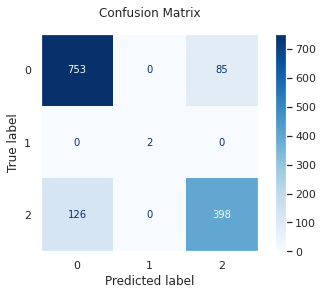

In [ ]:
# Base model
TrainEvaluate(X,y)

From the precision score values, the model needs tuning to improve its performance.

**Hyperparameter Tuning**

In [ ]:
# Randomized Search
def RSearch(X, y, params, folds, score):
  # Scaling
  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  # Regression model
  model = RandomForestClassifier()
  rs_model = RandomizedSearchCV(estimator = model,
                            param_distributions= params,
                            scoring = score,
                            n_iter=100,
                            cv= folds,
                            verbose= 1)
  # Model training
  rs_model.fit(X, y)
  # Best parameters
  print(f'Best parameters: {rs_model.best_params_}')
  # Best scores
  print(f'Best scores: {rs_model.best_score_}')

In [ ]:
# RandomForestClassifier randomized search
# Hyperparameters to be tested
rf_grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

In [ ]:
# Tuning
RSearch(X, y, rf_grid, 5, 'average_precision')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
Best scores: nan


In [ ]:
# Tuning
RSearch(X, y, rf_grid, 5, 'f1_weighted')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
Best scores: 0.8352339763116333


In [ ]:
# Random Forest Classification Model
def TrainEvaluateTuned(X,y,n = 200, samples = 4, leaf = 4, maxf = 'sqrt',
                       depth = 30, name = 'classifier.pkl'):
  # Training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
  # Standard scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  # Model training
  classifier = RandomForestClassifier(n_estimators = n, min_samples_split= samples,
                                      min_samples_leaf = leaf, max_features = maxf,
                                      max_depth = depth, random_state = 100)
  classifier.fit(X_train, y_train)

  # Predicting the test set results
  y_pred = classifier.predict(X_test)

  # Pickling the model
  pickle_out = open(name, 'wb')
  pickle.dump(classifier, pickle_out)
  pickle_out.close()

  # Metrics
  f1 = f1_score(y_test, y_pred, average = 'weighted')
  print(f'Weighted F1 Score: {f1}\n')
  print('Classification report')
  print(f'{"_"*70}\n')
  report = classification_report(y_test, y_pred)
  print(report)
  print(f'\n{"*"*70}\n')
  matrix_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                          display_labels=classifier.classes_,
                                          cmap = 'Blues')
  plt.grid(False)
  plt.title('Confusion Matrix' , y = 1.05)
  plt.show()

Weighted F1 Score: 0.8455944866473469

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           1       0.86      0.90      0.88       838
           2       1.00      0.50      0.67         2
           3       0.82      0.77      0.79       524

    accuracy                           0.85      1364
   macro avg       0.89      0.72      0.78      1364
weighted avg       0.85      0.85      0.85      1364


**********************************************************************



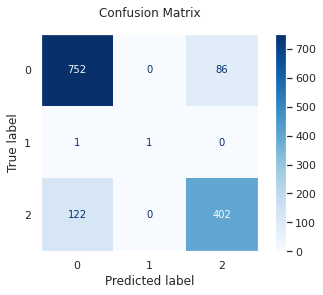

In [ ]:
# Tuned Model
TrainEvaluateTuned(X,y)

In [ ]:
{'n_estimators': 500, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20}

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

Weighted F1 Score: 0.8463290662261544

Classification report
______________________________________________________________________

              precision    recall  f1-score   support

           1       0.86      0.90      0.88       838
           2       1.00      1.00      1.00         2
           3       0.83      0.77      0.79       524

    accuracy                           0.85      1364
   macro avg       0.89      0.89      0.89      1364
weighted avg       0.85      0.85      0.85      1364


**********************************************************************



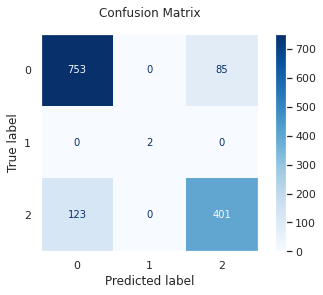

In [ ]:
# Implementation
TrainEvaluateTuned(X,y,n = 500, samples = 6, leaf = 2, maxf = 'auto',
                       depth = 20 )

# Findings

1. Most of the companies were in a stable financial position.

2. The net income to share holder equity of the majority of the companies were 

   around 0.8.

3. The borrowing dependancy of the most companies were around 0.4 and above 

   with  afew  exceptions falling below.

4. The net income to stock holder equity of stable firms is between 0.65 and 
   0. 88.

5. All unstable firms had a retain earning of less than 0.9.

6. Majority of the stable firms had  a borrowing dependancy of close to 
   0.39 and 0.6.

7. The distribution of the net income of unstable companies is left skewed.

8. In Kmeans clustering the optimal number of clusters was 3(obtained by  

  silhoutte  method plotting).

9. In the hierarchical clustering the results were as follows;

 a). word linkage method gives 4 clusters(the clusters were abit clear).

 b). The Average linkage method gives the visualizations that were not clear.

 c). The complete linkage methond, generates  aclear results than the average 

     linkage methond , but it was still abit difficult to identify the exact 
     
     number of clusters.

 d) There were two large clusters, one with 1814 observations and the other 
 
   with 4998 observations. tThe remaining clusters were smaller one. one had 5 
    
  observations and the other had 2 observations.

10. All the four clusters contains all the ten importance featurers. The 

 the contribution of each features in the four clusters were in different range.

 11. The cluster 1 represents the companies that are at risk (but in stable 
 
     position).

  12. Cluster 2 Contains mixed companies(on bankruptcy and stable position),
  
     but most of them are in stable position.

  13. Cluster 3 represents company that are bankrupts.

  14. Cluster 4 represent mixed companies(on bankruptcy and stable position),
  
     but most of them are in insolvency.
 


# Challenge the solution.

Kmeans and Hierarchichal clustering were used to determine the optimal number of clusters. The Kmeans implementation = 3, while hierarchichal = 4. Hierarchichal clustering was used to analyze and determine the financial status of organization.

# Recomendations.

1. The retained earning ratio should be mantained above o.9.

2. The borrowing dependancy ratio should be mantained between 0.39 and 0.6. 

3. The net income of to stake holder equity should be mantained at between   
   0.65 and 0.88.

# Follow up question.

## a) Did we have the right question?.

  Yes, the question was right.

## b) Do we need another data.

 Yes, more data, with balanced clusters will aid in making more accurate predictions of an organization's financial status.

## c) Did we have the right question.

Yes, the question was appropriate.